## Falcon 9 Exploratory Data Analysis, Data Preparation and Visualizations
#### Within this section of the overarching Data Analysis of the success rate of the Falcon 9 Landing Success Rates, we are able to view the data we've collected thus far to analyze the overall success of the Falcon 9 Rockets.
To begin, we'll start by importing the libraries we'll need as well as the .CSV file we've conducted Data Wrangling operations on from the "Falcon9_Data_Wrangling" file. We'll then begin ploting basic visualizations to describe the information we've gathered to analyze the success rates of rocket launches based on a number of different factors. 

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt

In [6]:
import io

Here we've simply imported our previous dataset and added it to our DataFrame for this particular part of our Analysis. 

In [7]:
df=pd.read_csv("dataset_part_2.csv")
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


Below, we can see the relationship between the number of flights conducted at each launch site Space X uses. Additionally, in each of the scatterplots below, we can identify the blue dots as failures, and the orange dots as successful landings of the Falcon 9 First Stage Rocket. As we can see, the relationship between the number of flights and the launch sites fairly confidently shows that, as the number of flights out of a given launch site increases, so do the number of increased successful landings. 

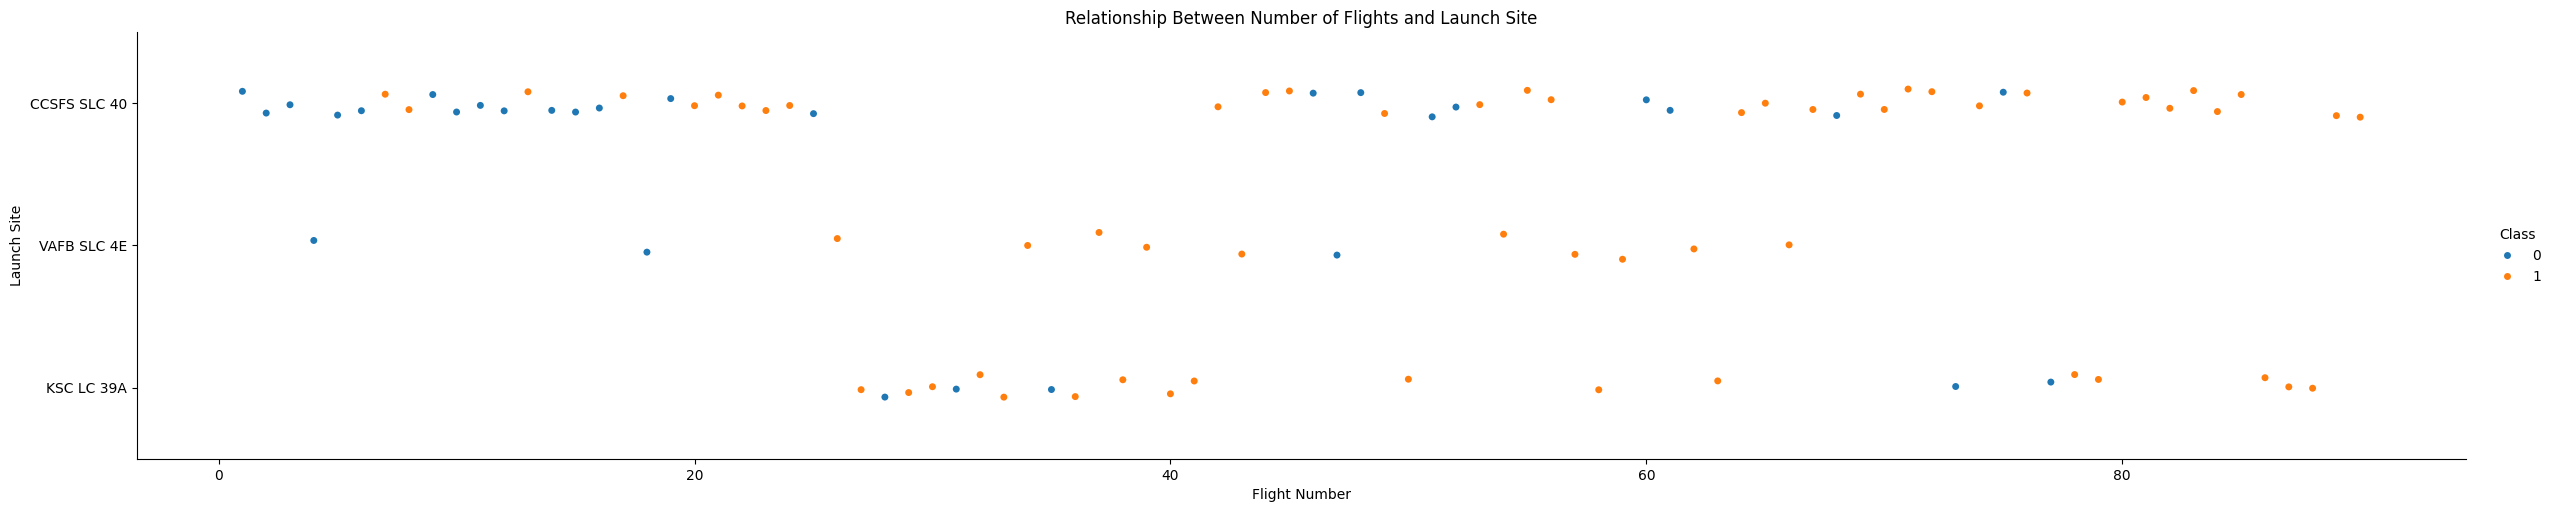

In [8]:
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value
sns.catplot(x='FlightNumber', y='LaunchSite', hue="Class", data=df, aspect = 5)
plt.title('Relationship Between Number of Flights and Launch Site')
plt.xlabel("Flight Number")
plt.ylabel("Launch Site")
plt.show()

Now we'll take a look to see if there is any potential relationship between the Payload Mass in KG of a Falcon 9 launch, and the number of flights. It becomes fairly apparent that, as the number of flights begins to increase, the tolerance for the amount of weight in each launch increases. Similarly, we can see that the number of failed landings begins to somewhat decline, particularly after roughly 70 launches. 

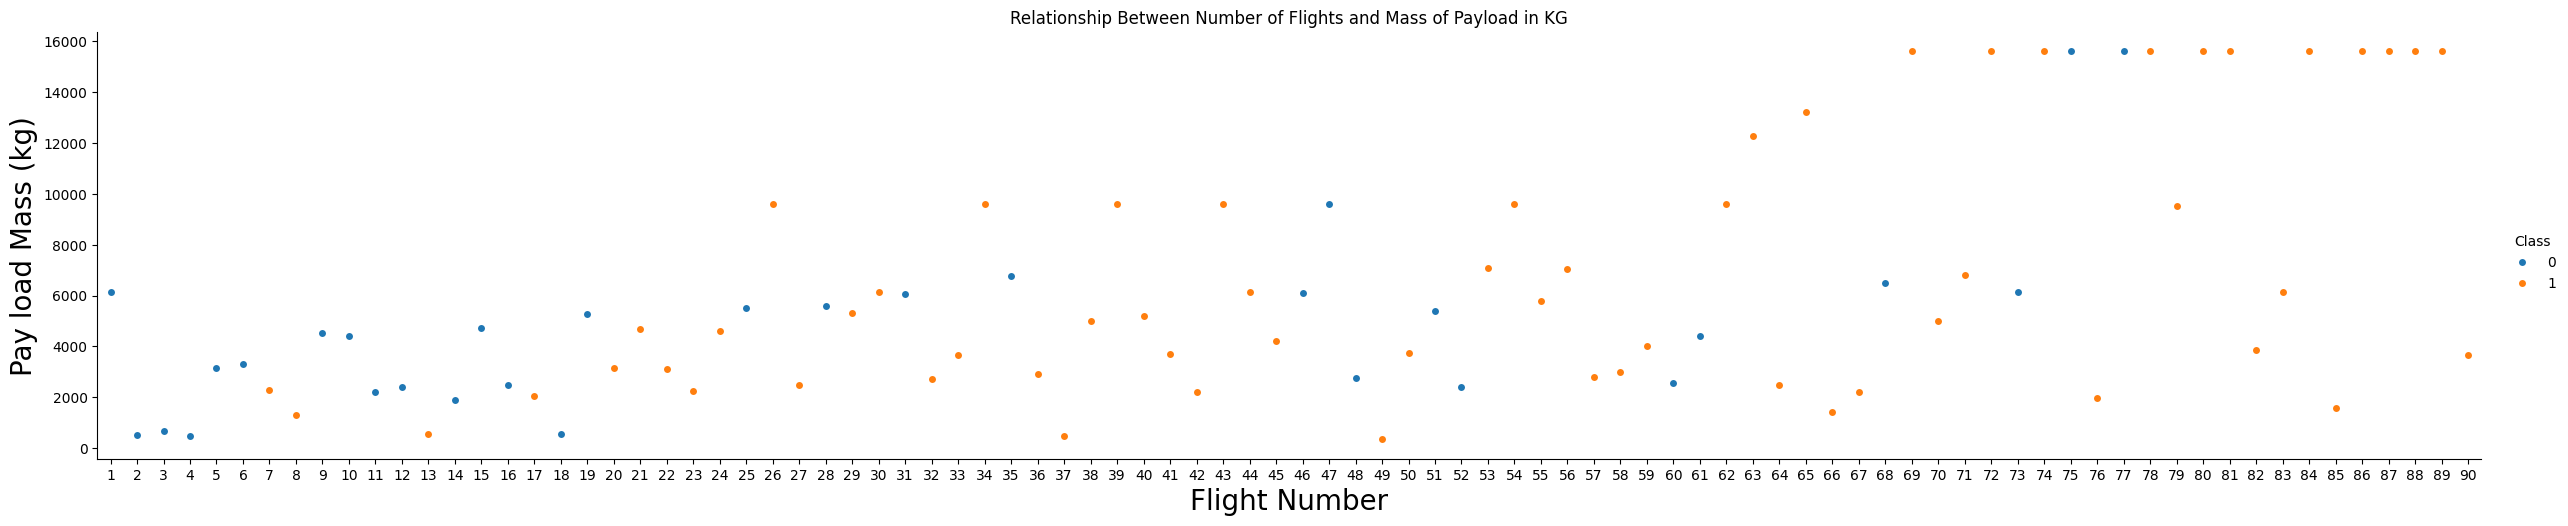

In [9]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.title('Relationship Between Number of Flights and Mass of Payload in KG')
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

Finally, we can see the relationship between the Payload Mass and the Launch Sites also has an interesting distribution of successes and failures. We can fairly clearly see that, with higher Payload Mass, the number of successful flights begins to increase. This is likely due to lower payload flights failing during testing and refining of SpaceX technology gradually improving not only the Payload Capacity, but also the number of successful flights. 

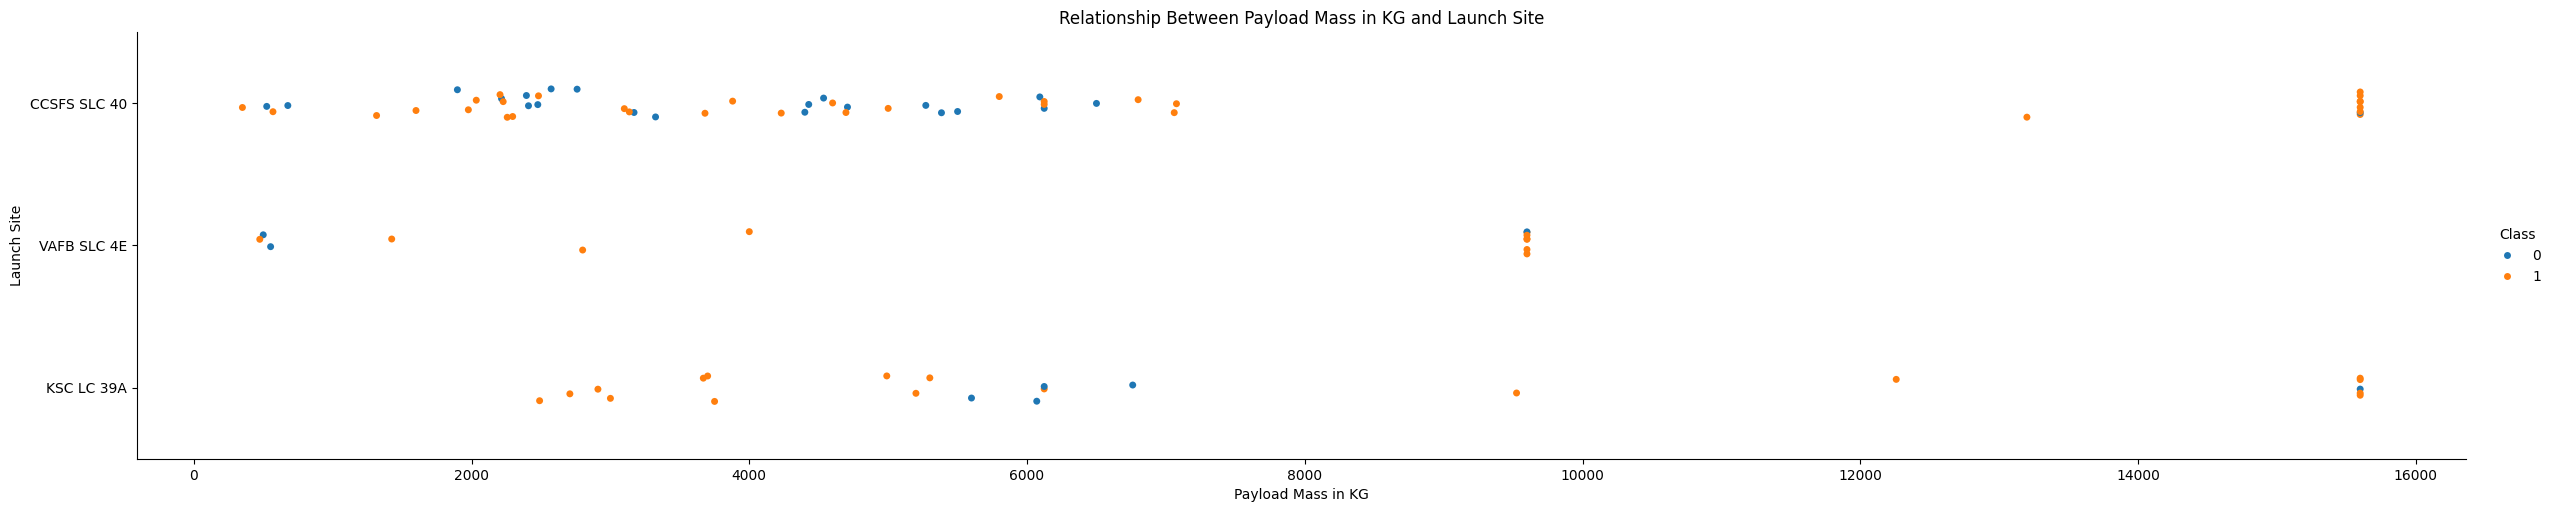

In [21]:
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value
sns.catplot(x='PayloadMass', y='LaunchSite', hue="Class", data=df, aspect = 5)
plt.title('Relationship Between Payload Mass in KG and Launch Site')
plt.xlabel("Payload Mass in KG")
plt.ylabel("Launch Site")
plt.show()

Below is an interesting comparison, where we can visualize the number of successful flights based on the type of orbit type the launch was intended for. ES-L1, GEO, HEO and SSO orbit launches all have successful landing rates of 100%. 

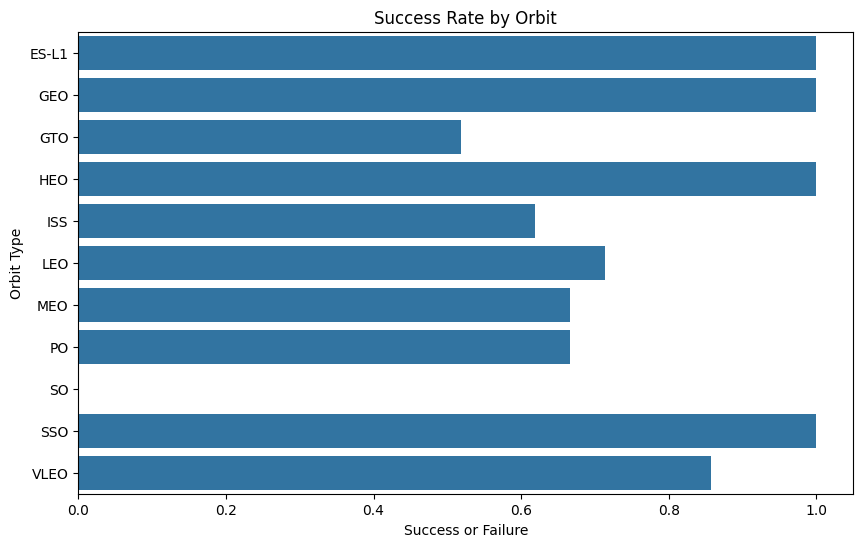

In [11]:
success_rate = df.groupby('Orbit')['Class'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Class', y='Orbit', data=success_rate)
plt.title('Success Rate by Orbit')
plt.xlabel('Success or Failure')
plt.ylabel('Orbit Type')
plt.show()

Now we'll analyze the flight number vs the orbit type. Interestingly, (or perhaps not so interstingly if you are a rocket scientist), the number of successful flights tends to increase for SSO, HEO and VLEO type orbits as the number of flights increase. As an aside, we can also visualize the statistical summary for these relationships for some interesting values. 

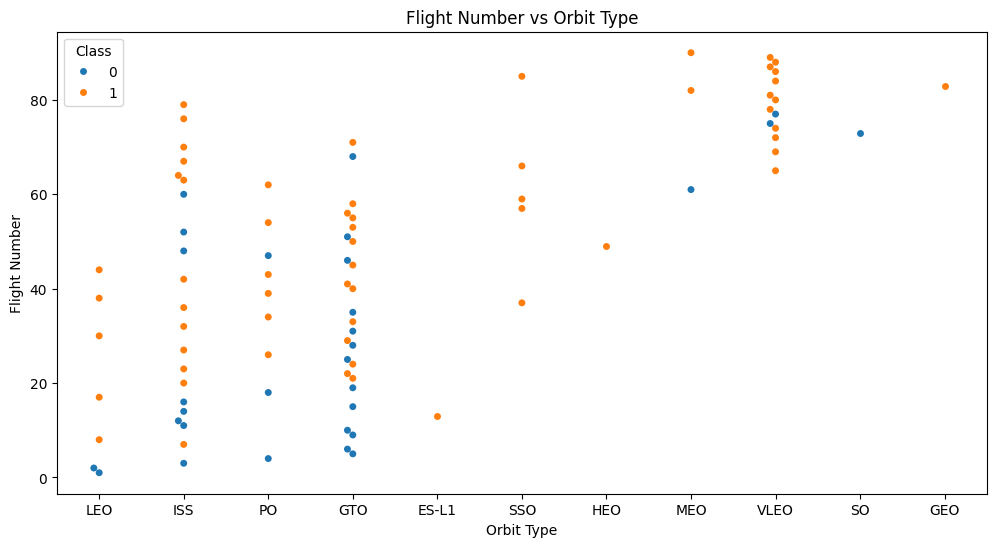

Summary Statistics of Flight Number by Orbit:
       count       mean        std   min    25%   50%   75%   max
Orbit                                                            
ES-L1    1.0  13.000000        NaN  13.0  13.00  13.0  13.0  13.0
GEO      1.0  83.000000        NaN  83.0  83.00  83.0  83.0  83.0
GTO     27.0  35.037037  18.842427   5.0  21.50  33.0  50.5  71.0
HEO      1.0  49.000000        NaN  49.0  49.00  49.0  49.0  49.0
ISS     21.0  39.142857  24.920445   3.0  16.00  36.0  63.0  79.0
LEO      7.0  20.000000  17.502381   1.0   5.00  17.0  34.0  44.0
MEO      3.0  77.666667  14.977761  61.0  71.50  82.0  86.0  90.0
PO       9.0  36.333333  18.131464   4.0  26.00  39.0  47.0  62.0
SO       1.0  73.000000        NaN  73.0  73.00  73.0  73.0  73.0
SSO      5.0  60.800000  17.297399  37.0  57.00  59.0  66.0  85.0
VLEO    14.0  78.928571   7.415828  65.0  74.25  79.0  85.5  89.0


In [12]:
plt.figure(figsize=(12, 6))
sns.swarmplot(x='Orbit', y='FlightNumber', hue="Class", data=df)

plt.title('Flight Number vs Orbit Type')
plt.xlabel('Orbit Type')
plt.ylabel('Flight Number')

plt.show()

summary = df.groupby('Orbit')['FlightNumber'].describe()
print("Summary Statistics of Flight Number by Orbit:")
print(summary)

Below, we visualize the orbit type of a launch and the payload of each launch. We can see some interesting differences within LEO, for example, where more successes occur as the payload increases. Conversly, we cannot gather much relevant information for GTO type orbital launches as the cluster is compact. 

<Figure size 1200x600 with 0 Axes>

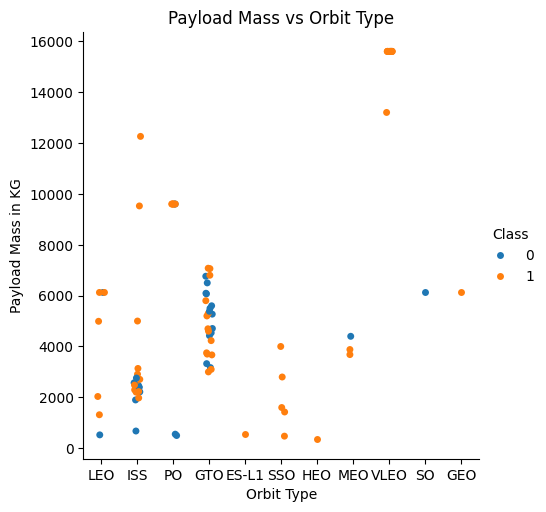

In [13]:
plt.figure(figsize =(12, 6))
sns.catplot(x='Orbit', y='PayloadMass', hue="Class", data=df)
plt.title('Payload Mass vs Orbit Type')
plt.xlabel('Orbit Type')
plt.ylabel('Payload Mass in KG')
plt.show()

Here, we are simply going to extract the years from our date column so that we can create a linear representation of the successes over the years, starting from 2010, and ending in 2020.

In [14]:
# A function to Extract years from the date 
year=[]
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
Extract_year()
df['Date'] = year
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


Below is a lineplot showing the success rates of the landings of the Falcon 9 rocket. In a previous portion of this analysis (see Falcon9_Data_Wrangling) we were able to conclude that the average success rate for the Falcon 9 was about 66.67%. When looking at 2017 to 2020, we can see that rate climbs nearer to 80% success.

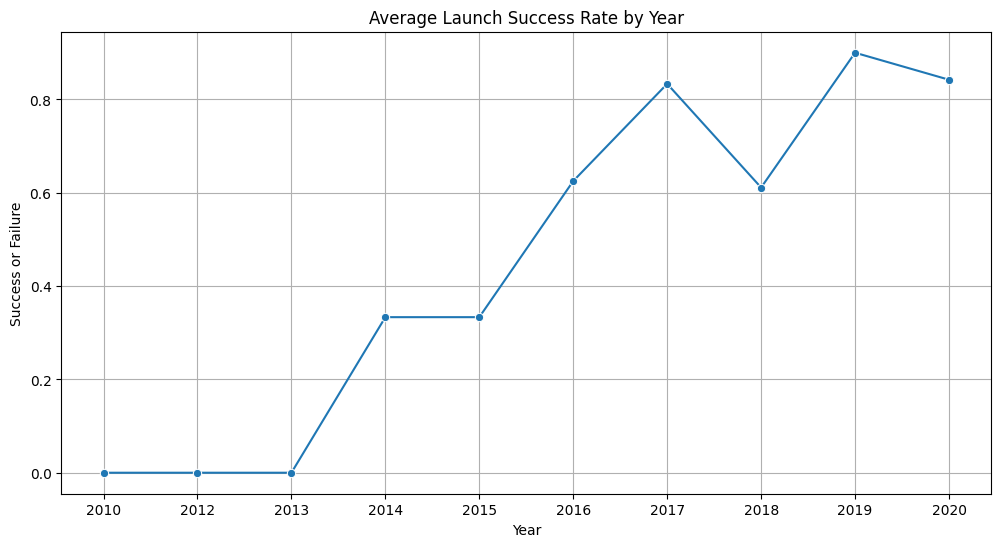

In [15]:
# Plot a line chart with x axis to be the extracted year and y axis to be the success rate
success_rate_by_year = df.groupby('Date')['Class'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Class', data=success_rate_by_year, marker='o')

plt.title('Average Launch Success Rate by Year')
plt.xlabel('Year')
plt.ylabel('Success or Failure')
plt.grid(True)

plt.show()

Finally, we'll conduct feature engineering to be utilized in future analysis of the Falcon 9 and save the .CSV with it's relevant changes for future use. 

In [16]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6123.547647,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [17]:
features_one_hot = pd.get_dummies(
    features,
    columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial']
)

features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6123.547647,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,525.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,677.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,500.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,3170.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False


In [18]:
features_one_hot = features_one_hot.astype('float64')
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1.0,6123.547647,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,525.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,677.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,500.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,3170.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
print("Data Types of Columns:")
print(features_one_hot.dtypes)

Data Types of Columns:
FlightNumber    float64
PayloadMass     float64
Flights         float64
GridFins        float64
Reused          float64
                 ...   
Serial_B1056    float64
Serial_B1058    float64
Serial_B1059    float64
Serial_B1060    float64
Serial_B1062    float64
Length: 80, dtype: object


In [20]:
features_one_hot.to_csv('dataset_part_3.csv', index=False)